### Data Generation

Use Multivariate Autoregressive (MVAR) model to simulate 4 channel singals

$$
{ \bf X } ( n ) = \sum _ { k = 1 } ^ { p } { \bf A } ( k ) { \bf X } ( n - k ) + { \bf U } ( n )
$$

* p = 2
* A1 = Bk[:,:,1], A2 = Bk[:,:,2]
* U is random noise

We note that signal 3 contains both 0.1Hz and 0.3Hz

In [1]:
import numpy as np
from numpy import cos, pi
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure, subplot,plot,xlim,title,ylim,xlabel,ylabel
from scipy.signal import welch, windows,coherence

In [2]:
import numpy as np
from numpy import cos, pi
import matplotlib.pyplot as plt 


## initialize parameters
N=500  # number of data points
M=4    # number of variables
p=2 # maximum lag, the number of past points used for AR
r1=0.9; f1=0.1 # oscillation channel 1, f in Hz
r2=0; f2=0.1 # oscillation channel 2, f in Hz
r3=0.9; f3=0.3 # oscillation channel 3, f in Hz
r4=0; f4=0.1 # oscillation channel 4, f in Hz

#Residual covariance matrix (DIAGONAL)
Sw = np.diag([1,1,1,1])

# Sw(1,:)=[1 0 0 0]
# Sw(2,:)=[0 1 0 0]
# Sw(3,:)=[0 0 1 0]
# Sw(4,:)=[0 0 0 1]

#effects at lag 1
Bk = np.zeros((4,4,2))

Bk[0,:,0]=[2*r1*cos(2*pi*f1), 0, 0, 0]
Bk[1,:,0]=[1, 2*r2*cos(2*pi*f2), 0.5, 0]
Bk[2,:,0]=[0, 0.5, 2*r3*cos(2*pi*f3), 0]
Bk[3,:,0]=[0, 0, 0, 2*r4*cos(2*pi*f4)]
#effects at lag 2
Bk[0,:,1]=[-r1**2, 0, 0, 0]
Bk[1,:,1]=[0, -r2**2, 0, 0]
Bk[2,:,1]=[0, 0.5, -r3**2, 0]
Bk[3,:,1]=[1, 0, 0, -r4**2]

# concateno in matrice Bm
A = np.hstack((Bk[:,:,0],Bk[:,:,1]))


In [130]:
## create simulated signal
U=np.random.randn(M,N) # uncorrelated gaussian innovations/noises
# U=np.random.standard_normal((M,N))
X=np.zeros((M,N))

for n in range(N):
    for k in range(p):
        if n-k<=0: break # if n<=p, stop when k>=n
#         X[:,n]=X[:,n] + ( A[:,k*M:(k+1)*M] @ X[:,n-k] )   # can also achieved by using MVARfilter function
        X[:,n]=X[:,n] + ( Bk[:,:,k]@ X[:,n-k] )

    X[:,n]=X[:,n]+U[:,n]



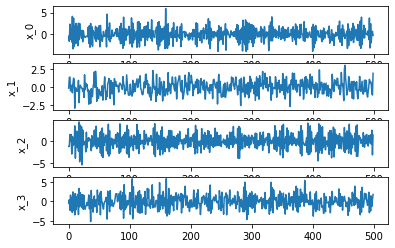

In [133]:
plt.figure() # realizations of functions
for i in range(M):
    plt.subplot(M,1,i+1)
    plt.plot(X[i,:])
    # xlim([0 N])
    plt.ylabel('x_' + str(i))


In [136]:
from scipy.io import loadmat

mat_data = loadmat('test.mat')

X = mat_data['X']


### Coherence analysis
Estimate and display the coherence between channels using mscohere

In [137]:
### try different parameters and compare results!!
noverlap=25 # overlapping for 25 data points
nfft=50    # the length of each segement for welch average

# noverlap=50 # overlapping for 50 data points
# nfft=100    # the length of each segement for welch average

# noverlap=0 # overlapping for 0 data point
# nfft=250    # the length of each segement for welch average

# noverlap=0 # overlapping for 0 data point
# nfft=500    # the length of each segement for welch average

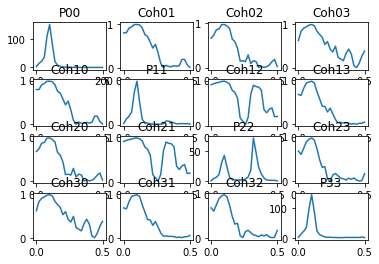

In [138]:
## estimate and display the coherence between channels using mscohere
figure()
for i in range(M):
    for j in range(M):
        if i==j:
            ### plot power spectrum of channel i using pwelch's method
            window = windows.hamming(nfft)
            [F,Sxx] = welch(X[i,:],samplerate,window,noverlap=noverlap,nfft=nfft)
            subplot(M,M,i*M+j+1),plot(F,Sxx)
            title('P' + str(i) + str(j))
        else:
            [F,Cxy] = coherence(X[i,:],X[j,:],samplerate, window,noverlap=noverlap,nfft=nfft)
            subplot(M,M,i*M+j+1),plot(F,Cxy)
            title('Coh' + str(i) +str(j))

plt.show()